In [1]:
# Import Standard packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read telco data from csv 
telco = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# Look for missing values
telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
#1a Which 2 demographics have proven to be the most popular with the telco brand?
telco_Age=telco.groupby(['SeniorCitizen'])["customerID"].count().reset_index()
telco_Age

,SeniorCitizen,customerID
0,0,5901
1,1,1142


In [5]:
telco_gender=telco.groupby(["gender"])["customerID"].count().reset_index()
telco_gender

,gender,customerID
0,Female,3488
1,Male,3555


In [6]:
#1b If the marketing team wanted to increase customer retention, to whom should
#they target their advertisements to?
telco_tenure=telco.groupby(['SeniorCitizen',"gender"])["tenure"].mean().reset_index()
telco_tenure

,SeniorCitizen,gender,tenure
0,0,Female,32.171233
1,0,Male,32.212680
2,1,Female,32.621479
3,1,Male,33.963415


<AxesSubplot:>

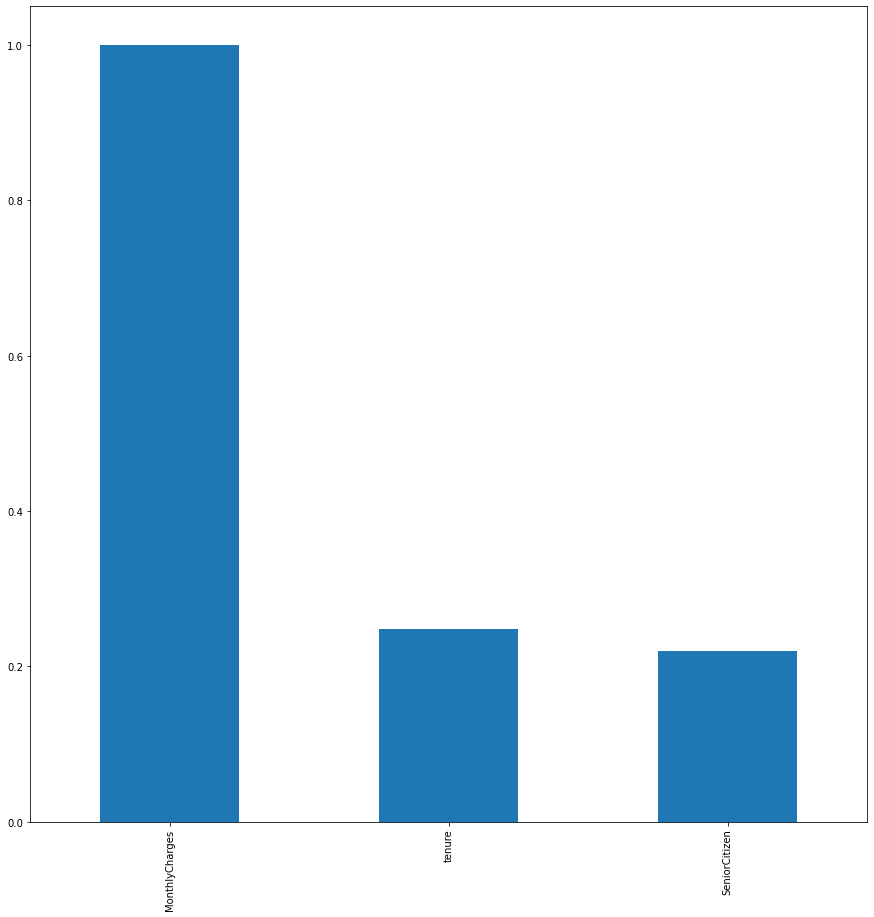

In [7]:
plt.figure(figsize=(15,15))
telco.corr()['MonthlyCharges'].sort_values(ascending = False).plot(kind='bar')

In [8]:
#2a Which 3 services are contributing to a higher monthly charge and resulting to
#customers churning? (Use visualizations in explaining your analysis)

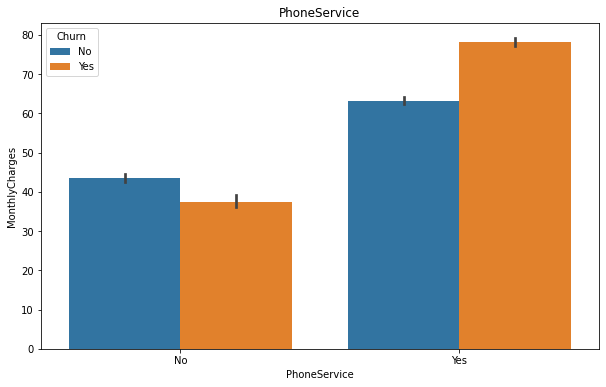

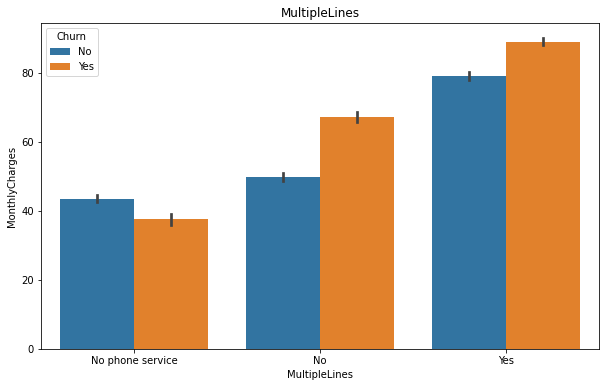

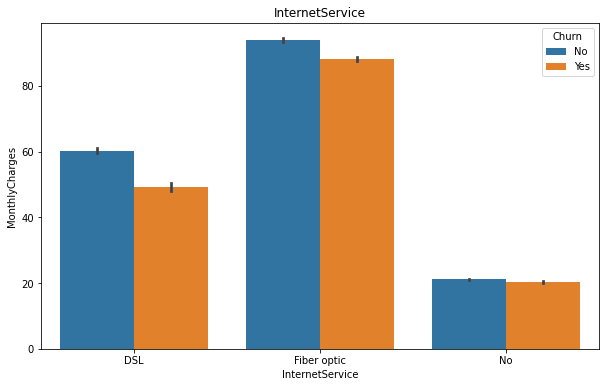

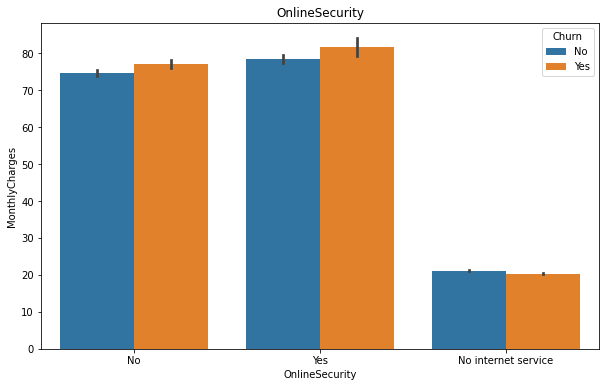

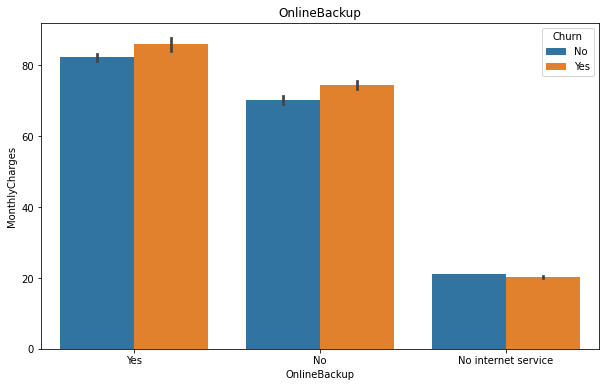

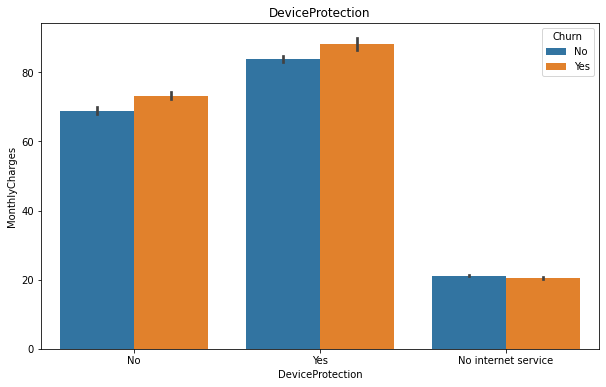

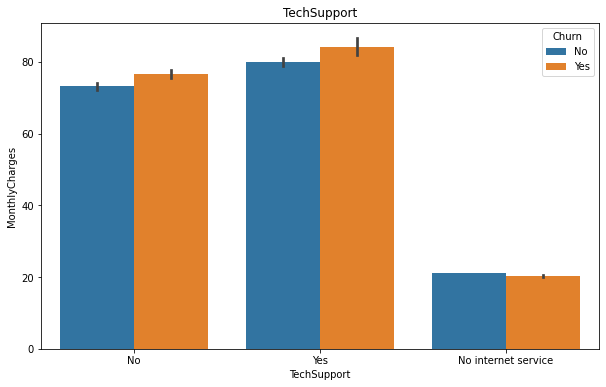

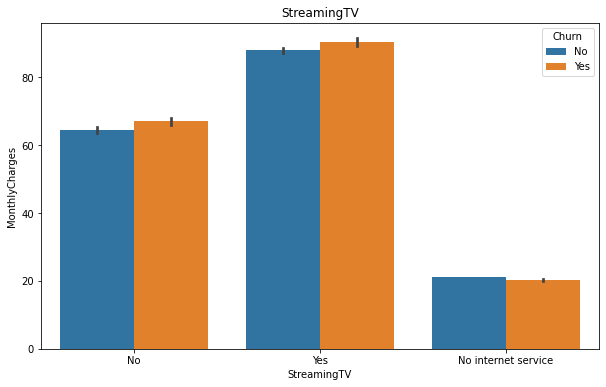

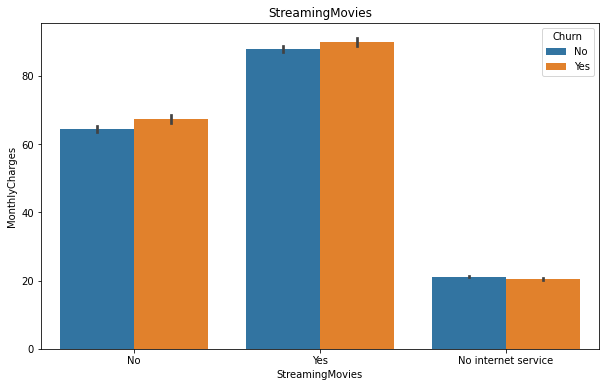

In [10]:
services =['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for service in services:
    plt.figure(figsize = (10, 6))
    sns.barplot(x = service, y = 'MonthlyCharges', data = telco, hue = 'Churn')
    plt.title(service)
    plt.show

In [12]:
#2 b If the telco was to offer Phone as a standalone service, which type of contract
#would encourage customer retention?
phone=telco[['PhoneService','tenure','Contract']]
phone


,PhoneService,tenure,Contract
0,No,1,Month-to-month
1,Yes,34,One year
2,Yes,2,Month-to-month
3,No,45,One year
4,Yes,2,Month-to-month
...,...,...,...
7038,Yes,24,One year
7039,Yes,72,One year
7040,No,11,Month-to-month
7041,Yes,4,Month-to-month


In [13]:
phoneonly=phone[phone.PhoneService=="Yes"]
phoneonly

,PhoneService,tenure,Contract
1,Yes,34,One year
2,Yes,2,Month-to-month
4,Yes,2,Month-to-month
5,Yes,8,Month-to-month
6,Yes,22,Month-to-month
...,...,...,...
7037,Yes,72,Two year
7038,Yes,24,One year
7039,Yes,72,One year
7041,Yes,4,Month-to-month


<AxesSubplot:xlabel='Contract', ylabel='tenure'>

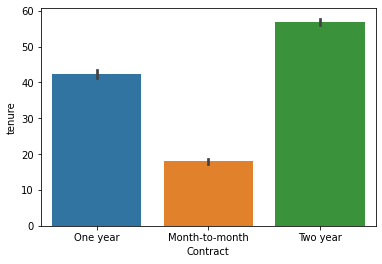

In [14]:
sns.barplot(x="Contract", y="tenure",data=phoneonly)

In [ ]:
# 3 b If the company was to streamline all its services into 3 bouquet packages, what
#monthly prices will be appropriate for the following packages to keep customers
#from churning:
#i. Basic
#ii. Plus
#iii. Premium

In [15]:
payment=telco[['PaymentMethod','MonthlyCharges','Churn']]
payment

,PaymentMethod,MonthlyCharges,Churn
0,Electronic check,29.85,No
1,Mailed check,56.95,No
2,Mailed check,53.85,Yes
3,Bank transfer (automatic),42.30,No
4,Electronic check,70.70,Yes
...,...,...,...
7038,Mailed check,84.80,No
7039,Credit card (automatic),103.20,No
7040,Electronic check,29.60,No
7041,Mailed check,74.40,Yes


In [ ]:
#3 b Should the company strictly go paperless for their monthly billings as a technique
#of keeping their customers and why?

In [27]:
paperless=telco[['PaperlessBilling','Churn']]
paperless

,PaperlessBilling,Churn
0,Yes,No
1,No,No
2,Yes,Yes
3,No,No
4,Yes,Yes
...,...,...
7038,Yes,No
7039,Yes,No
7040,Yes,No
7041,Yes,Yes


In [28]:
paperless[paperless.PaperlessBilling=="Yes"].count()

PaperlessBilling    4171
Churn               4171
dtype: int64

In [26]:
paperless2=paperless.groupby(['PaperlessBilling'])["Churn"].count().reset_index()
paperless2

,PaperlessBilling,Churn
0,No,2872
1,Yes,4171
